
# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Wed, September 14</p>



In [12]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
import seaborn

# Question 1: Applications of machine learning (10 pts)

The article "Of Prediction and Policy", posted on Canvas under Modules --> Additional Resources, mentions several applications of machine learning. Pick any one of the works mentioned in this short article and:

1. (2 pts) Find at least one technical article that describes the work and provide the  citation(s). Very easy to do by Googling the names/institutions.
2. (4pts) In a few sentences describe the methodology/approach that was used.
3. (2 pts) Summarize in a couple of sentences what you liked about this work, and
4. (2 pts) Also summarize in a couple of sentences any concerns you may have about the work or its  application to societal problems.


## Answer



# Question 2: Maximum likelihood estimate (10 pts)

Consider the following univariate probability distribution 
$$p(x|a,b) = \frac{x^{a-1}}{\Gamma(a)b^a}exp(-\frac{x}{b}),$$ for $x \geq 0$ and $a,b > 0.  ~~ \Gamma(a)$ is a normalization term. 

You are given N i.i.d. data points drawn from this distribution. Derive the MLE estimate for $b$, in terms of $x_1, x_2, \ldots x_N$ and $a$.

## Answer



The first step is to define the likelihood function by taking the product of the entire distribution:

$$ L(a,b) = \prod_{i=1}^{N} \frac{x^{a-1}}{\Gamma(a)b^a}exp(-\frac{x}{b}) $$

Which can be simplified to:

$$ L(a,b) = \frac{\prod_{i=1}^{N} x_i^{a-1}}{\Gamma(a^N)b^{a*n}}exp(\frac{\sum_{i=1}^{N} x_i}{-b}) $$

Taking the natural log of both sides, this equation becomes:

$$ ln[L(a,b)] = (a-1)*ln(\prod_{i=1}^{N} x_i) - N*ln(\Gamma*a) - N*a*ln(b) - \frac{\sum_{i=1}^{N} x_i}{b} $$

Next, since we are deriving the MLE estimate for b, we must differentiate the right side of this function with respect to b:

$$ -\frac{N*a}{b} + \frac{\sum_{i=1}^{N} x_i}{b^2} $$

The MLE for b is the value of b when this equation is equal to zero. Therefore, we set this equation equal to zero and solve for b:

$$ -\frac{N*a}{b} + \frac{\sum_{i=1}^{N} x_i}{b^2} = 0 $$
$$ \frac{N*a}{b} = \frac{\sum_{i=1}^{N} x_i}{b^2} $$
$$ N*a*b^2 = b*\sum_{i=1}^{N} x_i $$
$$ b = \frac{\sum_{i=1}^{N} x_i}{N*a} $$

# Question 3: Conditional Distributions (10 pts)

The joint pdf of two random  variables $X_1$ and $X_2$ is  constant (i.e., the joint distribution is uniform) within the area shown below, and zero outside of it. Given this joint distribution, obtain  the following two univariate distributions from it. It is not necessary to write the equations, if the distributions can be plotted / described in full detail.

a. (6 pts) The marginal distribution of $X_1$, $p_{X_1}(x_1)$

b. (4 pts) The conditional distribution $p_{X_2|X_1}(x_2 \,|\, x_1 = 0.5)$

<img src="hw1p3_questionpic.png">

## Answer



### a. Marginal distribution of $X_1$, $p_{X_1}(x_1)$

The marginal distribution of $X_1$, $p_{X_1}(x_1)$ is an isosceles triangle with a base length of 2 and a height of 1. The base goes from 0 to 2 on the $x_1$ axis and the height is equal to 1 when $x_1 = 1$.

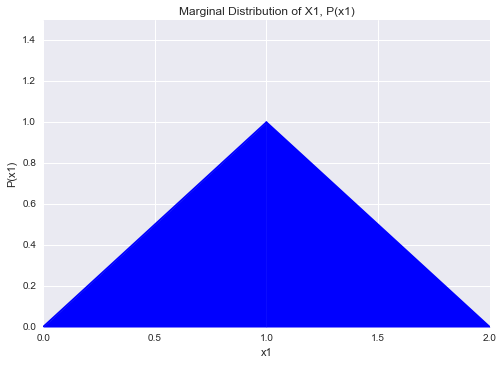

In [57]:
x1 = np.arange(0,1.01,0.01)
x2 = np.arange(1,2.01,0.01)

y0 = 0
y1 = x1
y2 = 2-x2

plt.plot(x1, y1, x2, y2, color = 'blue')
plt.fill_between(x1, y0, y1, color='blue')
plt.fill_between(x2, y0, y2, color = 'blue')
plt.ylim([0,1.5])
plt.xlim([0,2])
plt.xlabel('x1')
plt.ylabel('P(x1)')
plt.title('Marginal Distribution of X1, P(x1)')

### b. Conditional distribution $p_{X_2|X_1}(x_2 \,|\, x_1 = 0.5)$

Given that $X_1 = 0.5$, the conditional distribution for $p_{X_2|X_1}$ is a straight line at $p_{X_2|X_1} = 1$ for $0 < x_2 < 1$ and 0 everywhere else. 

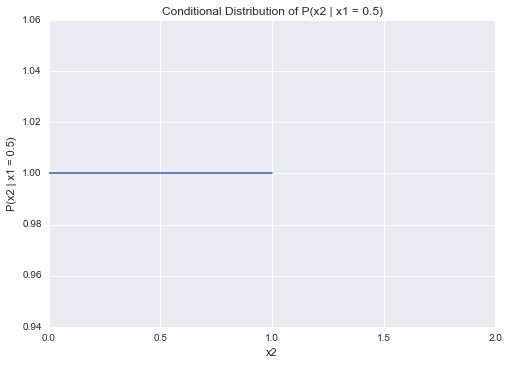

In [60]:
plt.plot((0,1),(1,1))
plt.xlim(0,2)
plt.xlabel('x2')
plt.ylabel('P(x2 | x1 = 0.5)')
plt.title('Conditional Distribution of P(x2 | x1 = 0.5)')

# Question 4: Bivariate Normal Distribution (20 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 4; \sigma_y^2 = 16; \rho = 0$
2. $\sigma_x^2 = 4; \sigma_y^2 = 16; \rho = 0.5$

a. (8 pts) Obtain contour plots for each of the two distributions using  Python (http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html). 

b. (6 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (6 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

## Answer



### a. Contour Plots

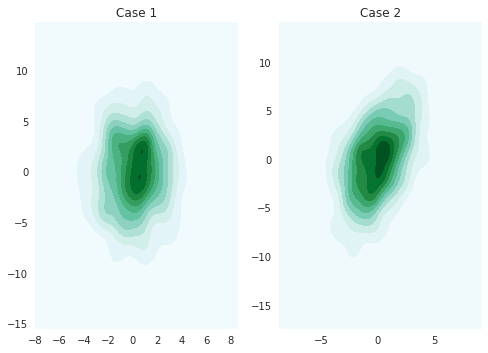

In [272]:
import seaborn as sns; sns.set(color_codes=True)

# Case 1
mean1 = [0,0]
cov1 = [[4,0],[0,16]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, size=1000).T

# Case 2
mean2 = [0,0]
cov2 = [[4,4],[4,16]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, size=1000).T

# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.kdeplot(x1, y1, ax=ax1, shade=True)
ax1.set_title('Case 1')
sns.kdeplot(x2, y2, ax=ax2, shade=True)
ax2.set_title('Case 2')

### b. 3-D Plots

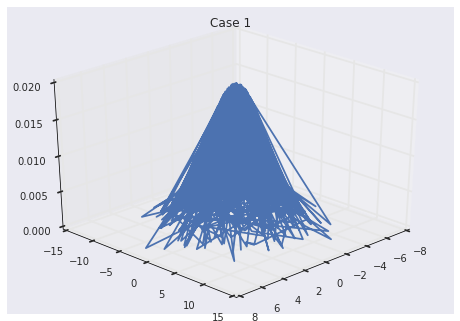

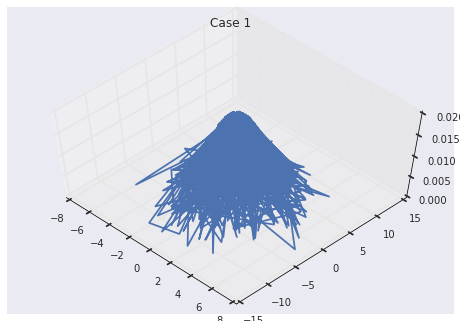

In [273]:
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal
import numpy as np; np.random.seed(123)

# Case 1
z = multivariate_normal(mean=mean1, cov=cov1)
z1 = [z.pdf([x1[i],y1[i]]) for i in range(0,len(x1))]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
X, Y, Z = x1, y1, z1
ax1.plot_wireframe(X, Y, Z)
ax1.set_title('Case 1')
ax1.view_init(30,45)

fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
X, Y, Z = x1, y1, z1
ax2.plot_wireframe(X, Y, Z)
ax2.set_title('Case 1')
ax2.view_init(60,-45)

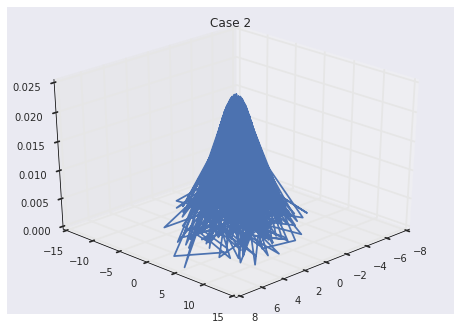

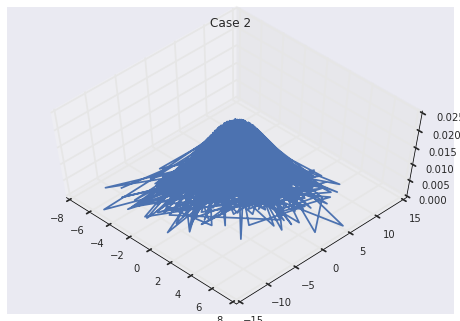

In [274]:
# Case 2
z = multivariate_normal(mean=mean2, cov=cov2)
z2 = [z.pdf([x2[i],y2[i]]) for i in range(0,len(x1))]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
X, Y, Z = x2, y2, z2
ax1.plot_wireframe(X, Y, Z)
ax1.set_title('Case 2')
ax1.view_init(30,45)

fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
X, Y, Z = x2, y2, z2
ax2.plot_wireframe(X, Y, Z)
ax2.set_title('Case 2')
ax2.view_init(60,-45)

### c. Rotated Distribution

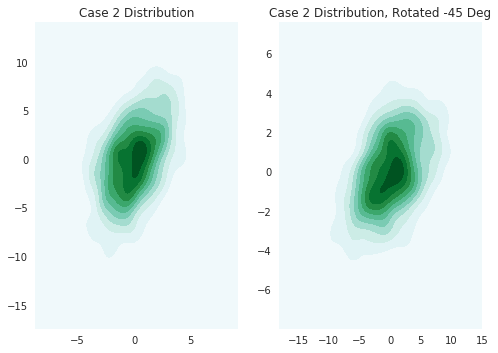

In [275]:
from math import cos, sin

# Create new variables using rotation matrix
u = x2*cos(-45) - y2*sin(-45)
v = x2*sin(-45) + y2*cos(-45)

# Plot rotated distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.kdeplot(x2, y2, ax=ax1, shade=True)
ax1.set_title('Case 2 Distribution')
sns.kdeplot(u, v, ax=ax2, shade=True)
ax2.set_title('Case 2 Distribution, Rotated -45 Deg')

# Question 5: MLR using scikit-learn (20 pts)

Consider the dataset (Advertising.csv), which has the following variables:

  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)


We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

1. (2 pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows. (Use shape and head commands in python)
2. (4 pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.
2. (2 pts) Fit a simple linear regression of SALES on TV. What is the regression coefficient for TV and what is its interpretation?
3. Split the data randomly into a training and test set (keep 1/3rd of the data for test).

  * (4 pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. 
  * (2 pts) Report the MSE obtained on train data. How much does this increase when you score your
model on test data?
  * (2 pts) Report the coefficients obtained by your model.
  * (4 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.


## Answer



### 1. Shape and First 5 Rows

In [50]:
Ad = pd.read_csv("Advertising.csv")
Ad.shape

(200, 5)

In [6]:
Ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### 2. Features vs. Response Variable

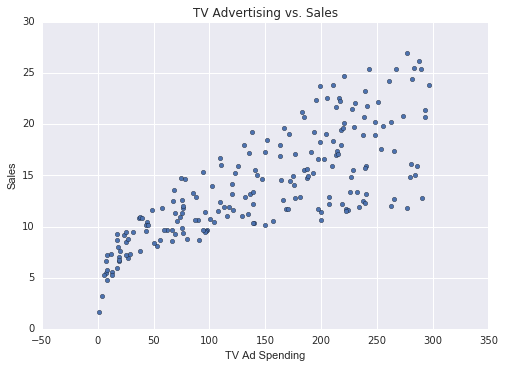

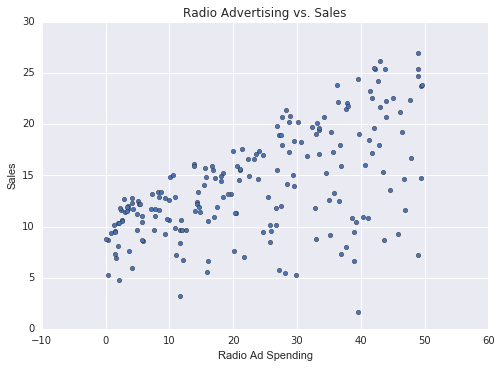

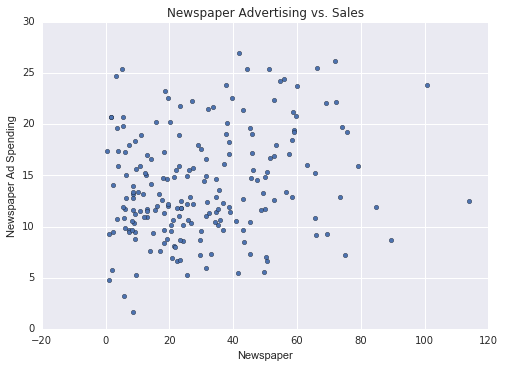

In [95]:
# Plot TV vs. Sales
Ad.plot(kind = 'scatter', x = 'TV', y = 'Sales', title = 'TV Advertising vs. Sales')
plt.xlabel('TV Ad Spending')

# Plot Radio vs. Sales
Ad.plot(kind = 'scatter', x = 'Radio', y = 'Sales', title = 'Radio Advertising vs. Sales')
plt.xlabel('Radio Ad Spending')

# Plot Newspaper vs. Sales
Ad.plot(kind = 'scatter', x = 'Newspaper', y = 'Sales', title = 'Newspaper Advertising vs. Sales')
plt.ylabel('Newspaper Ad Spending')

- **TV vs. Sales**: There appears to be a strong positive relationship between TV advertising spending and sales
- **Radio vs. Sales**: There appears to be a positive relationship between radio advertising spending and sales. This relationship does not appear as strong as the correlation between TV and sales.
- **Newspaper vs. Sales**: There does not appear to be much of a relationship between newspaper advertising spending and sales.

### 3. Simple Linear Regression (Sales on TV)

In [79]:
lm_SalesTV = pd.ols(x=Ad['TV'], y=Ad['Sales'])
lm_SalesTV


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         200
Number of Degrees of Freedom:   2

R-squared:         0.6119
Adj R-squared:     0.6099

Rmse:              3.2587

F-stat (1, 198):   312.1450, p-value:     0.0000

Degrees of Freedom: model 1, resid 198

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0475     0.0027      17.67     0.0000     0.0423     0.0528
     intercept     7.0326     0.4578      15.36     0.0000     6.1352     7.9300
---------------------------------End of Summary---------------------------------

- **Regression Coefficient for TV:** 0.0475
- ** Interpretation**: For every additional $1,000 spent on TV advertising, sales should increase by about 47.5 widgets.

### 4. Multiple Linear Regression

In [151]:
from sklearn.cross_validation import train_test_split

# Split data into training and test sets
Ad_train, Ad_test = train_test_split(Ad, test_size=0.33, random_state = 12345)

In [154]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
from sklearn.metrics import mean_squared_error
from math import sqrt

# Fit MLR on training set
## Design Matrices
Y_train, X_train = dmatrices('Sales ~ TV + Radio + Newspaper', data = Ad_train, return_type = 'dataframe')
y_train = Y_train['Sales'].values

## MLR Model
mlr_Sales = LinearRegression()
mlrFit_Sales = mlr_Sales.fit(X_train, y_train)

# Evaluate on test set
## Design Matrices
Y_test, X_test = dmatrices('Sales ~ TV + Radio + Newspaper', data = Ad_test, return_type = 'dataframe')
y_test = Y_test['Sales'].values

## Predictions
mlrPred_Sales = mlr_Sales.predict(X_test)

## Root Mean Square Error
MSE_test = mean_squared_error(y_test, mlrPred_Sales)
RMSE_test = sqrt(MSE_test)
print 'MSE: ', MSE_test
print 'RMSE: ', RMSE_test, '\n'
print 'The MLR model produced a root mean squared error of', RMSE_test, 'when predicting the test data.'

MSE:  4.37046671198
RMSE:  2.09056612236 

The MLR model produced a root mean squared error of 2.09056612236 when predicting the test data.


In [160]:
# Evaluate on training set
mlrPred2_Sales = mlr_Sales.predict(X_train)
MSE_train = mean_squared_error(y_train, mlrPred2_Sales)
RMSE_train = sqrt(MSE_train)
print 'MSE: ', MSE_train
print 'RMSE: ', RMSE_train, '\n'
print 'The MLR model produced a root mean squared error of', RMSE_train, 'when predicting the training data.'
print 'This is', RMSE_test - RMSE_train, 'lower than what we saw when predicting the test data.'
print 'However, this difference changes quite a bit with different training and test sets due to the small size of the sample.'

MSE:  2.11389931407
RMSE:  1.45392548436 

The MLR model produced a root mean squared error of 1.45392548436 when predicting the training data.
This is 0.636640638004 lower than what we saw when predicting the test data.
However, this difference changes quite a bit with different training and test sets due to the small size of the sample.


In [168]:
# Report Coefficients
print 'The coefficients obtained by the MLR model are: ', '\n'
print 'Intercept:', mlr_Sales.coef_[0]
print 'TV:', mlr_Sales.coef_[1]
print 'Radio:', mlr_Sales.coef_[2]
print 'Newspaper:', mlr_Sales.coef_[3]

The coefficients obtained by the MLR model are:  

Intercept: 0.0
TV: 0.0442532271064
Radio: 0.188883253106
Newspaper: -0.0113562106346


(array([  1.,   0.,   0.,   0.,   4.,   8.,   6.,  15.,  21.,  11.]),
 array([-9.35104529, -8.14499247, -6.93893966, -5.73288685, -4.52683404,
        -3.32078123, -2.11472842, -0.90867561,  0.2973772 ,  1.50343002,
         2.70948283]),
 <a list of 10 Patch objects>)

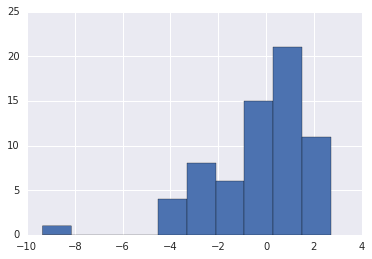

In [171]:
# Assess Results
mlrRes_Sales = y_test - mlrPred_Sales
plt.hist(mlrRes_Sales)

The residuals appear to be centered around zero, as one would expect from a good linear regression fit. They are also skewed toward the left, though, rather than showing a completely normal distribution. This indicates that the model is not ideal. However, the residual distribution is close enough to normal to suggest that a multivariate linear regression model could be a good predictor with a larger training set.

# Question 6: Illustrating the curse of dimensionality (10 pts)

For a hypersphere of radius $a$ in $d$ dimensions, the volume is related to the surface area of a unit hypersphere (S) as
    $$ V = \frac{S \times a^d}{d}.$$


1. (6 pts) Use this result to show that the fraction of the volume which lies at values of the radius between $a - \epsilon$ and $a$, where $0 < \epsilon < a$, is given by
$f = 1 - (1 - \epsilon/a)^d$. Hence, show that for any fixed $\epsilon$, no matter how small, this fraction tends to 1 as $d \rightarrow \infty$.
2. (4 pts) Evaluate the ratio $f$ numerically, with $\epsilon/a = 0.01$, for the cases $d$ = 2, 10, and 1000.


This problem shows that if data are randomly distributed within a very high-dimensional hypersphere, most of the mass is near the surface and there is very little of it near the "core". Thus, there are few "representative" points.

## Answer



### 1. 

If we let $V_t$ be the total volume of a sphere and $V_{a -\epsilon}$ be the volume of the sphere which lies at values of the radius between $a - \epsilon$ and $a$, then the equation for the fraction of the volume which lies at values of the radius between $a - \epsilon$ and $a$ is given by the following equation:

$$ \frac{V_{a - \epsilon}}{V_t} = \frac{\frac{S * a^d}{d} - \frac{S * (a-\epsilon/)^d}{d}}{\frac{S * a^d}{d}} $$

This equation can be simplified to:

$$ \frac{V_{a - \epsilon}}{V_t} = 1 - \frac{(a - \epsilon)^d}{a^d} $$

Which can be further simplified to: 

$$ \frac{V_{a - \epsilon}}{V_t} = 1 - (1 - \frac{\epsilon}{a})^d $$

The limit as $ d \to \infty $ of this equation can be modeled by:

$$ lim_{d \to \infty}[1 - (1 - \frac{\epsilon}{a})^d] $$

Which is the same as:

$$ 1 - lim_{d \to \infty}(1 - \frac{\epsilon}{a})^d $$

Since $ 0 < \epsilon < a$, it follows that $ 0 < \frac{\epsilon}{a} < 1 $ and $ lim_{d \to \infty}(1 - \frac{\epsilon}{a})^d = 0 $. Therefore:

$$ 1 - lim_{d \to \infty}(1 - \frac{\epsilon}{a})^d = 1 - 0 = 1 $$ 

### 2.

In [10]:
def f(ea_rat, d):
    return 1 - pow(1 - ea_rat,d)

ea_rat = 0.01
d = [2,10,1000]

for dim in d:
    print 'When d = %i, f = %f' % (dim, f(ea_rat, dim))

When d = 2, f = 0.019900
When d = 10, f = 0.095618
When d = 1000, f = 0.999957


As illustrated in part 1, $f$ approaches 1 as d gets larger.